<a href="https://colab.research.google.com/github/DanielRasho/Paralela-proj3/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3 - Detección de líneas

- Daniel Rayo
- Nahomy Castro
- Xavier López
- Irving Acosta

### Instalación de CUDA

In [36]:
# Install CUDA C++ plugin for Colab:
!pip install nvcc4jupyter
# Install libpng development library
!apt-get update
!apt-get install -y libpng-dev

# Check CUDA installation
!nvcc --version
%load_ext nvcc4jupyter

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.2 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,411 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,288 kB]
Get:14

In [28]:
# Install libpng development library
!apt-get update
!apt-get install -y libpng-dev

# Check CUDA installation
!nvcc --version# Dependencias
# !pip install opencv-python pillow

In [34]:
# Detect selected GPU and its NVIDA architecture:
import subprocess
gpu_info = subprocess.getoutput("nvidia-smi --query-gpu=name,compute_cap --format=csv,noheader,nounits")
if "not found" in gpu_info.lower(): raise RuntimeError("Error: No GPU found. Please select a GPU runtime environment.")
gpu_name, compute_cap = map(str.strip, gpu_info.split(','))
gpu_arch = f"sm_{compute_cap.replace('.', '')}"

print(f"{'GPU Name':<15}: {gpu_name}")
print(f"{'Architecture':<15}: {gpu_arch}")

GPU Name       : Tesla T4
Architecture   : sm_75


## Funcionamiento del algoritmo

## Generacion de PGM

Para probar el algoritmo con diferentes tipos de entradas, a continuación se muestra el script utilizado para poder transformar imagenes corrientes en su versión pgm.

In [8]:
# EXECUTE JUST ONCE!!!!
!rm -rf ./media
!git clone --depth 1 https://github.com/opencv/opencv.git
!mkdir -p ./media/
!mkdir -p ./media/raw
!mkdir -p ./media/output
!cp -r opencv/samples/data/* ./media/raw
!rm -rf opencv
!rm -rf ./media/raw/aruco ./media/raw/dnn/

Cloning into 'opencv'...
remote: Enumerating objects: 9126, done.
remote: Counting objects: 100% (9126/9126), done.
remote: Compressing objects: 100% (7794/7794), done.
remote: Total 9126 (delta 1430), reused 4713 (delta 893), pack-reused 0 (from 0)
Receiving objects: 100% (9126/9126), 89.53 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (1430/1430), done.
Updating files: 100% (7664/7664), done.


In [10]:
import cv2
from pathlib import Path

input_dir = Path("./media/raw")
output_dir = Path("./media/pgm")
output_dir.mkdir(parents=True, exist_ok=True)

LOW_THRESH, HIGH_THRESH = 100, 200

# Gather only supported files
files = [f for f in input_dir.iterdir() if f.suffix.lower() in [".png", ".jpg", ".jpeg"]]

for i, file in enumerate(sorted(files)):
    img = cv2.imread(str(file), cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Could not read {file}, skipping.")
        continue

    blur = cv2.GaussianBlur(img, (3, 3), 0)
    edges = cv2.Canny(blur, LOW_THRESH, HIGH_THRESH)

    output_path = output_dir / f"{i}.pgm"
    cv2.imwrite(str(output_path), edges)

print("🎉 Finished processing all PNG/JPG images.")


🎉 Finished processing all PNG/JPG images.


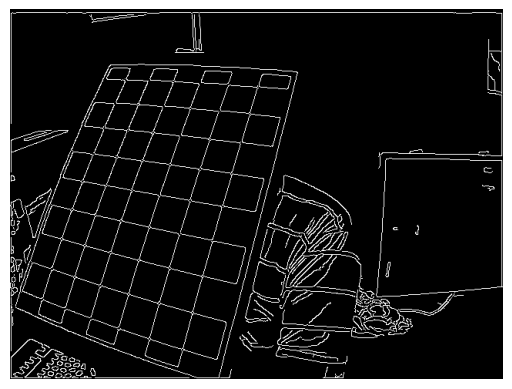

In [27]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./media/pgm/76.pgm", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Memoria Global

1.   List item
2.   List item



In [ ]:
!nvcc -o main main.cu $(pkg-config --cflags --libs libpng)
!./main ./media/pgm/0.pgm ./media/output/0.png

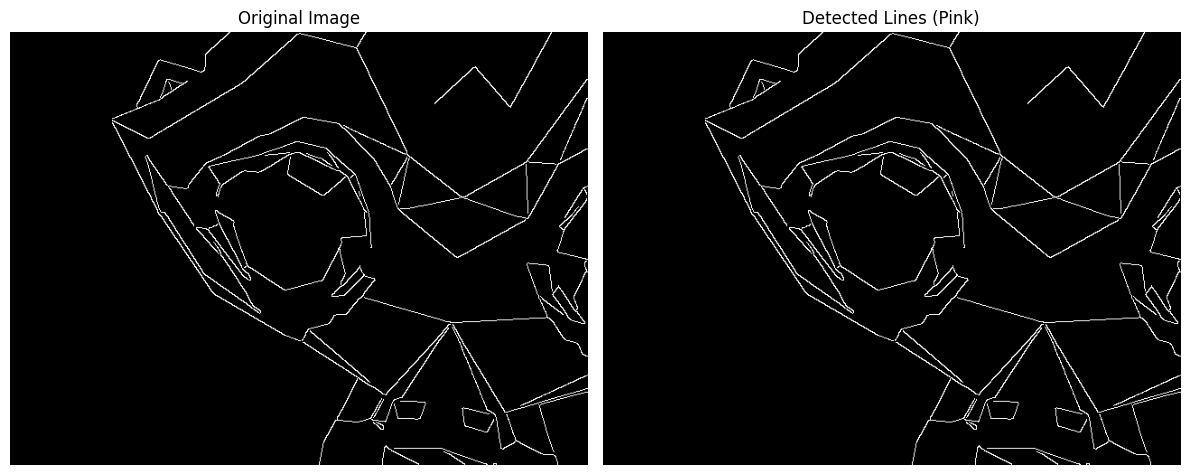

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

name = '0'

# Display original
original = Image.open('./media/pgm/'+name+".pgm")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')
plt.axis('off')


# Display result with detected lines
result = Image.open('./media/output/'+name+".png")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Detected Lines (Pink)')
plt.axis('off')
plt.tight_layout()
plt.show()